# Battle of Dazar'alor Guild Awards Analysis

<ul>
<li><a href="#collect">Collect Analysis Data</a></li>
<li><a href="#nzoth">N'Zoth the Corruptor</a>
    <ul>
        <li><a href="#nz_interrupts">Interrupts</a></li>
        <li><a href="#devour">Devour Thoughts</a></li>
        <li><a href="#anguish">Anguish</a></li>
        <li><a href="#corrupted">Corrupted Viscera</a></li>
        <li><a href="#burst">Psychic Burst</a></li>
        <li><a href="#flames">Flames of Insanity</a></li>
        <li><a href="#sanity">All Avoidable Forms of Insanity</a></li>
        <li><a href="#jf_dispells">Dispells</a></li>
    </ul></li>
<li><a href="#overall">Overall</a>
    <ul>
        <li><a href="#pots">Most Pots Used</a></li>
        <li><a href="#healthstone">Most Healthstones/Pots Used</a></li>
        <li><a href="#rankings">Rankings</a></li>
        <li><a href="#prog-parse">Highest Parse on Progression Kill</a></li>
        <li><a href="#least-damage">Least Damage on Progression Kills</a></li>
        <li><a href="#attendance">Attendance</a></li>
        <li><a href="#kills">Boss Kills</a></li>
    </ul></li>
</ul>

This notebook extracts information from the [Warcraft Logs](https://www.warcraftlogs.com/) API to produce data for the [Tempest](https://tempest-proudmoore.enjin.com/) Battle of Dazar'alor guild awards.

## Setup

In [1]:
# Import all required libraries and modules
import os
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warcraft_logs_fn as wl
import log_analysis as la
import api_key

In [2]:
# Import key
api_key = api_key.key

In [3]:
guild_info = wl.GUILD_INFO

# Confirm start dates for Mythic N'Zoth logs
fights = requests.get("https://www.warcraftlogs.com:443/v1/reports/guild/Dauntless/Tichondrius/US?api_key=" + api_key)
requests_df = pd.DataFrame(fights.json())
requests_df.head()

,end,id,owner,start,title,zone
0,1597894578444,b4K6R7WJNcarfpGH,Shadowbaine,1597889031915,M Nya,24
1,1597812943452,3Y7TBD8Wn6ACrL1m,Shadowbaine,1597802709571,M Nya,24
2,1597548989656,v8f7MHAntVBNhYyC,Shadowbaine,1597544918238,Alt Raid,24
3,1597378665609,hrY49w8zPTFDqcGb,Jampers,1597371006458,M Nya,24
4,1597294688019,QPvZ9LwqyhVJ2CkN,Shadowbaine,1597284611104,M Nya,24


In [17]:
earliest_mythic = requests_df.query('id == "BWm2KctaFw3G71Zd" & owner == "Jampers" & title == "H Nya"')
log_start = requests_df.iloc[earliest_mythic['start'].idxmin]
log_start

end         1580277202051
id       BWm2KctaFw3G71Zd
owner             Jampers
start       1580266800476
title               H Nya
zone                   24
Name: 124, dtype: object

The first mythic log starts at 1580266800476.

In [5]:
# Get player info
player_list = pd.read_csv('player_list.csv', encoding='iso-8859-1')
player_list

,player,primary_role,alt,tier_end,tier_start,start_date
0,Irvaeryss,mdps,NaN,True,True,NaN
1,Metonymy,rdps,NaN,True,True,NaN
2,Dzkillingme,mdps,NaN,False,True,NaN
3,Petrøl,rdps,NaN,True,True,NaN
4,Ayriea,healer,NaN,True,True,NaN
5,Arkamani,rdps,NaN,True,True,NaN
6,Earrl,tank,NaN,True,True,NaN
7,Luthial,healer,NaN,True,True,NaN
8,Shuxd,mdps,NaN,True,True,NaN
9,Nockedloose,rdps,NaN,True,True,NaN


In [18]:
# Extract logs
log_info = wl.get_logs(api_key, guild_info, log_start=log_start['start'])
wl.save_logs(log_info, api_key, guild_info, log_start=log_start['start'])

# Create boss list
boss_list = ['Wrathion', 
             'Prophet Skitra', 
             'Maut', 
             'Dark Inquisitor Xanesh', 
             'Vexiona',
             'The Hivemind', 
             'Ra-den the Despoiled', 
             'Shad\'har the Insatiable', 
             'Drest\'agath',
             'Il\'gynoth, Corruption Reborn',
             'Carapace of N\'Zoth',
             'N\'Zoth the Corruptor']

# Extract fight details and save
fight_df = wl.extract_fights(boss_list)
wl.create_master_list(log_info, fight_df)

Creating file cbHvrWPT3K7NYatg
Creating file 8YxQLTDAwNmKP4kR
Creating file YdQ4GZXzRx6P7Kgr
Creating file zcwnDjQypVbRHdMa
Creating file XPTrW4kR6NLxGcKn
Creating file L2BJzHXqrkCQcf3g
Creating file T36rygQMzCv9kbKR
Creating file qKpgdWQk21RZTD9X
Creating file WwbG6BTQrJ9YMKR4
Creating file TH9GkCtKQ1cFv6hp
Creating file Zd98bvyfAM7Dgrqc
Creating file AYhyHm9bQWXaNG7L
Creating file ZMWR8Tz31ywgArfb
Creating file TGnzaLcm9bRdCAJW
Creating file paH4wMWxnJ6CrvL9
Creating file DH62NLJRBVQz7pc1
Creating file kCBRzxPLYdV12DwZ
Creating file 9qL1dyvpxJCZkVrD
Creating file jkHWvy7J1CrYNf28
Creating file NVhG6pCngHP7QRZq
Creating file fNpdT8kmntJYXMab
Creating file zaA1bgknQfJxWR8X
Creating file BpKfMj8Qm49rbhan
Creating file LQjVYTJtpry7c3G2
Creating file BcKgzjnY4yF7kpVw
Creating file YqN8JXHG6aCcw7gM
Creating file qprBZL9AGhzQ2KgN
Creating file wnL3VBd2JFmTzbrt
Creating file cdzQYkWyv2hK4XD6
Creating file yfbVxKgT9jw1DptW
Creating file fqRpGWkYCQ1yLvPT
Creating file AmQh6FHJgKZNbkTv
Creating

C:\Users\rebecca\Git-Hub-Repos\wow-analysis\warcraft_logs_fn.py:190: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, merged_df])


Log ID ThRZk89H3aX1wgpY done.
Log ID tMV1gc7jDr8bnLAm done.
Log ID txYnQhqaX4cT8kWL done.
Log ID v8f7MHAntVBNhYyC done.
Log ID VGyK31rmcMFpvwjA done.
Log ID vnzN64y3kAKwd8PB done.
Log ID vZ8dHxANLrKCFyDM done.
Log ID VzFkHA4nBL3pxf9R done.
Log ID w2dtXg6nMjWR8VqA done.
Log ID WBMxwqFd7VTp923r done.
Log ID WJwFgjpzt7qLNC41 done.
Log ID wkgJNHmdWCpjR3BT done.
Log ID wnL3VBd2JFmTzbrt done.
Log ID WThY6abB1tFqQyAN done.
Log ID WwbG6BTQrJ9YMKR4 done.
Log ID X48DbgkcFTLVh37B done.
Log ID X9fMWz8kQgVvCntR done.
Log ID XLNpkbcBjDAWRG4Z done.
Log ID xNXBMHqmkVP4aCnc done.
Log ID XPTrW4kR6NLxGcKn done.
Log ID YdQ4GZXzRx6P7Kgr done.
Log ID yf19wW3Mm7KhRLbj done.
Log ID YF7VQbhHnDK6g4k3 done.
Log ID yfbVxKgT9jw1DptW done.
Log ID ynwa3RXh6DBKNbAY done.
Log ID YP4gjvzfm6rLBGda done.
Log ID YqN8JXHG6aCcw7gM done.
Log ID yZR39cpNkVahAJ2f done.
Log ID Z39Y2zP7BthqKf4y done.
Log ID zaA1bgknQfJxWR8X done.
Log ID ZB7pzRHNqJGCcjdn done.
Log ID zcwnDjQypVbRHdMa done.
Log ID Zd98bvyfAM7Dgrqc done.
Log ID zFt

In [8]:
# Check all players added
fight_df.player_name.unique()

array(['Corvala', 'Reavertotems', 'Divanance', 'Jocastta', 'Galateyah',
       'Metalepsis', 'Cunegonde', 'Nightsevera', 'Crystalform',
       'Starshaman', 'Illestrae', 'Snipershad', 'Kopie', 'Niccombtw',
       'Plusjuice', 'Metonymy', 'Chaotixz', 'Ayreia', 'Inradhrill',
       'Petrøl', 'Toyqt', 'Apakullii', 'Luthial', 'Earrl', 'Nockedloose',
       'Kopye', 'Divinance', 'Shadowbaine', 'Arkamani', 'Niccom', 'Owoo',
       'Jampers', 'Deviöus', 'Lauly', 'Shuxd', 'Mythrose', 'Ølympius',
       'Irvaeryss', 'Snektemple', 'Demonraptor', 'Raddex', 'Shuventura',
       'Lauliy', 'Goatscheese', 'Mongoroidz', 'Avayne', 'Pvechampion',
       'Euphemisms', 'Symadai', 'Prophet', 'Snertroids', 'Tahvidots',
       'Zodyhunt', 'Premierpumpr', 'Thelyne', 'Bobbydigital', 'Onggor',
       'Jamperss', 'Psichopathic', 'Hemroids', 'Zodey', 'Humanraptor',
       'Aphy', 'Ðestructiön', 'Lizsbeth', 'Cheatpocket', 'Lokcom',
       'Thicciminaj', 'Kardx', 'Toxicdh', 'Usimare', 'Soulish',
       'Tassyvenger

All players are accounted for.

<a id='collect'></a>
## Collect Analysis Data

In [19]:
api_key = api_key.key
guild_info = wl.GUILD_INFO
player_list = pd.read_csv('player_list.csv', encoding='iso-8859-1')
master_list = pd.read_csv('master_list.csv', encoding='iso-8859-1')
master_list = master_list[master_list.difficulty == 5] # Get mythic only

In [15]:
# Confirm boss IDs
boss_info = ['boss_id', 'boss_name']
master_list.drop_duplicates(subset=boss_info)[boss_info]

,boss_id,boss_name
0,2344,N'Zoth the Corruptor
851,2329,Wrathion
871,2333,The Hivemind
891,2331,Ra-den the Despoiled
911,2337,Carapace of N'Zoth
2779,2334,Prophet Skitra
2799,2327,Maut
2839,2328,Dark Inquisitor Xanesh
2899,2336,Vexiona
2959,2343,Drest'agath


<a id='nzoth'></a>
## N'Zoth the Corruptor

<a id='nz_interrupts'></a>
### Interrupts
Interrupt Spell IDs:
- Mage: Counterspell (2139), Dragon's Breath (31661)
- Druid: Solar Beam (78675), Skull Bash (106839)
- Warrior: Pummel (6552), Intimidating Shout (5246)
- Hunter: Counter Shot (147362), Concussive Shot (5116)
- Rogue: Kick (1766), Kidney Shot (408)
- DH: Consume Magic (183752)
- Shaman: Wind Shear (57994), Lightning/Cap Totem (192058)
- Paladin: Rebuke (96231), Hammer of Justice (853)
- Monk: Spear Hand Strike (116705), Leg Sweep (119381)
- DK: Mind Freeze (47528)
- Warlock: Spell Lock - pet (19647)
- Priest: Silence - Shadow (15487), Holy Word: Chastise (88625)

In [16]:
interrupt_ids1 = [2139, 31661, 78675, 106839, 6552, 5246, 147362, 5116, 1766, 408, 183752] 
interrupt_ids2 = [57994, 192058, 96231, 853, 116705, 119381, 47528, 19647, 15487, 88625]

In [17]:
nzoth_interrupts = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in interrupt_ids1:
    try:
        print('\nSpell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2344)
        nzoth_interrupts = pd.concat([nzoth_interrupts, spell_df])
    except:
        continue

Spell Id: 2139
Player added: Kopye
Player added: Ølympius
Player added: Petrøl
Player added: Kopye
Player added: Metonymy
Player added: Petrøl
Player added: Kopye
Player added: Petrøl
Player added: Ølympius
Player added: Metonymy
Player added: Kopye
Player added: Metonymy
Player added: Petrøl
Player added: Ølympius
Player added: Kopye
Player added: Ølympius
Player added: Metonymy
Player added: Petrøl
Player added: Petrøl
Player added: Ølympius
Player added: Metonymy
Player added: Kopye
Player added: Petrøl
Player added: Metonymy
Player added: Petrøl
Player added: Metonymy
Player added: Kopye
Player added: Ølympius
Player added: Kopye
Player added: Ølympius
Player added: Metonymy
Player added: Petrøl
Player added: Ølympius
Player added: Petrøl
Player added: Kopye
Player added: Metonymy
Player added: Petrøl
Player added: Ølympius
Player added: Kopye
Player added: Petrøl
Player added: Kopye
Player added: Ølympius
Player added: Metonymy
Player added: Petrøl
Player added: Metonymy
Player ad

Player added: Apakulli
Player added: Apakulli
Player added: Apakulli
Player added: Apakulli
Spell Id: 106839
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Spell Id: 6552
Player added: Bobbydigital
Player added: Niccom
Player added: Niccom
Player added: Bobbydigital
Player added: Niccom
Player added: Bobbydigital
Player added: Niccom
Player added: Niccom
Player added: Bobbydigital
Player added: Bobbydigital
Player added: Niccom
Player added: B

Player added: Zodyhunt
Player added: Apakullii
Player added: Arkamani
Player added: Nockedloose
Player added: Zodyhunt
Player added: Arkamani
Player added: Nockedloose
Player added: Arkamani
Player added: Nockedloose
Player added: Zodyhunt
Player added: Arkamani
Player added: Apakullii
Player added: Zodyhunt
Player added: Arkamani
Player added: Apakullii
Player added: Nockedloose
Player added: Zodyhunt
Player added: Apakullii
Player added: Nockedloose
Player added: Arkamani
Player added: Zodyhunt
Player added: Zodyhunt
Player added: Apakullii
Player added: Arkamani
Player added: Zodyhunt
Player added: Arkamani
Player added: Nockedloose
Player added: Apakullii
Player added: Zodyhunt
Player added: Arkamani
Player added: Nockedloose
Player added: Nockedloose
Player added: Arkamani
Player added: Zodyhunt
Player added: Zodyhunt
Player added: Arkamani
Player added: Apakullii
Player added: Arkamani
Player added: Nockedloose
Player added: Apakullii
Player added: Arkamani
Player added: Zodyhunt

Player added: Irvaeryss
Player added: Shuxd
Player added: Irvaeryss
Player added: Shuxd
Player added: Shuxd
Player added: Irvaeryss
Player added: Irvaeryss
Player added: Shuxd
Player added: Irvaeryss
Player added: Shuxd
Player added: Shuxd
Player added: Irvaeryss
Player added: Shuxd
Player added: Irvaeryss
Player added: Irvaeryss
Player added: Shuxd
Player added: Shuxd
Player added: Irvaeryss
Player added: Shuxd
Player added: Irvaeryss
Player added: Shuxd
Player added: Irvaeryss
Player added: Irvaeryss
Player added: Shuxd
Player added: Shuxd
Player added: Irvaeryss
Player added: Irvaeryss
Player added: Shuxd
Player added: Irvaeryss
Player added: Irvaeryss
Player added: Shuxd
Player added: Irvaeryss
Player added: Shuxd


In [18]:
for spell_id in interrupt_ids2:
    try:
        print('\nSpell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2344)
        nzoth_interrupts = pd.concat([nzoth_interrupts, spell_df])
    except:
        continue


Spell Id: 57994
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor

Spell Id: 192058
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor
Player added: Onggor

Spell Id: 96231
Player added: Toyqt
Player added: Toyqt
Player added: Toyqt
Player added: Toyqt
Player added: Toyqt
Player added: Toyqt
Player added: Toyqt
Player add

Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Aphy
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance

Spell Id: 119381
Player added: Divinance
Player added: Divinance
Player added: Lauly
Player added: Divinance
Player added: Lauly
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Lauly
Player added: Lauly
Player added: Divinance
Player added: Lauly
Player added: Divinance
Player added: Divinance

Player added: Cunegonde
Player added: Cunegonde
Player added: Voidsp
Player added: Voidsp
Player added: Cunegonde
Player added: Cunegonde
Player added: Cunegonde
Player added: Voidsp
Player added: Cunegonde
Player added: Voidsp
Player added: Voidsp

Spell Id: 88625
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial
Player added: Luthial


          player   count  fight_count primary_role  av_count
24         Shuxd  3017.0          484         mdps  6.233471
18        Niccom  2482.0          438         mdps  5.666667
4   Bobbydigital  1921.0          375         mdps  5.122667
28      Zodyhunt  2244.0          445         rdps  5.042697
30      Ølympius  1674.0          362         rdps  4.624309
13         Kopye  1823.0          406         rdps  4.490148
8    Dzkillingme   636.0          146         mdps  4.356164
19   Nockedloose  1386.0          364         rdps  3.807692
11     Irvaeryss  1496.0          444         mdps  3.369369
26         Toyqt  1480.0          447         mdps  3.310962
25       Thelyne    79.0           26         mdps  3.038462
7      Divinance  1459.0          512         tank  2.849609
21        Petrøl  1437.0          512         rdps  2.806641
2       Arkamani  1298.0          489         rdps  2.654397
9          Earrl  1344.0          512         tank  2.625000
16      Metonymy  1025.0

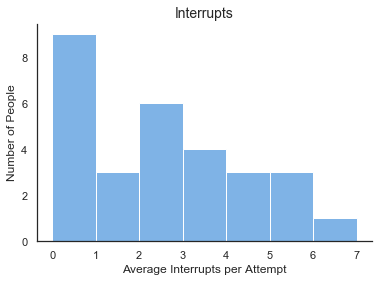

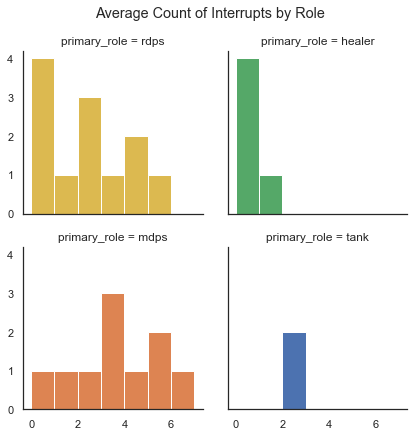

Mean is 2.472951 per attempt.
Median is 2.625000 per attempt.
Max attempts by player is 512.


In [133]:
bins = np.arange(0, 8, 1)
la.collect_stats(data=nzoth_interrupts, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Interrupts', 
                 analysis_columns=['count'], min_attempts=1, least=False, bins=bins)

<a id='devour'></a>
### Devour Thoughts

- Spell ID: 318771
- 10 Sanity per hit

In [142]:
devour_thoughts = wl.damage_taken(api_key, master_list, 318771, boss_id=2344, hit_type='hitCount')

Player added: Earrl
Player added: Niccom
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Ølympius
Player added: Kopye
Player added: Irvaeryss
Player added: Shuxd
Player added: Toyqt
Player added: Petrøl
Player added: Mythrose
Player added: Apakulli
Player added: Divinance
Player added: Nockedloose
Player added: Cunegonde
Player added: Arkamani
Player added: Luthial
Player added: Onggor
Player added: Niccom
Player added: Divinance
Player added: Onggor
Player added: Shuxd
Player added: Irvaeryss
Player added: Voidsp
Player added: Lauly
Player added: Ayreia
Player added: Arkamani
Player added: Metonymy
Player added: Cunegonde
Player added: Earrl
Player added: Kopye
Player added: Mythrose
Player added: Apakulli
Player added: Petrøl
Player added: Toyqt
Player added: Nockedloose
Player added: Zodyhunt
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Divinance
Player added: Metonymy
Player added: Deviöus
Player added: Niccom
Player added: Inradhrill
Player

Player added: Divinance
Player added: Metonymy
Player added: Luthial
Player added: Irvaeryss
Player added: Ayreia
Player added: Apakullii
Player added: Nockedloose
Player added: Shuxd
Player added: Ølympius
Player added: Shadowbaine
Player added: Cunegonde
Player added: Kopye
Player added: Toyqt
Player added: Earrl
Player added: Lauly
Player added: Petrøl
Player added: Zodyhunt
Player added: Bobbydigital
Player added: Niccom
Player added: Mythrose
Player added: Zodyhunt
Player added: Metonymy
Player added: Shadowbaine
Player added: Ayreia
Player added: Owoo
Player added: Toyqt
Player added: Earrl
Player added: Onggor
Player added: Arkamani
Player added: Irvaeryss
Player added: Lauly
Player added: Dzkillingme
Player added: Nockedloose
Player added: Bobbydigital
Player added: Divinance
Player added: Petrøl
Player added: Shuxd
Player added: Voidsp
Player added: Niccom
Player added: Toyqt
Player added: Nockedloose
Player added: Earrl
Player added: Arkamani
Player added: Bobbydigital
Player

          player   hits  damage_taken  fight_count primary_role  av_count
19   Nockedloose   40.0     7291846.0          364         rdps  0.109890
21        Petrøl   59.0    10232851.0          512         rdps  0.115234
3         Ayreia   51.0     9075870.0          436       healer  0.116972
2       Arkamani   62.0    11383816.0          489         rdps  0.126789
17      Mythrose   72.0    12346318.0          499       healer  0.144289
13         Kopye   66.0    11425014.0          406         rdps  0.162562
12       Jampers   59.0     9436269.0          361       healer  0.163435
16      Metonymy   85.0    13593391.0          477         rdps  0.178197
30      Ølympius   69.0    12443384.0          362         rdps  0.190608
28      Zodyhunt   85.0    15411640.0          445         rdps  0.191011
0       Apakulli   69.0    11534300.0          337         rdps  0.204748
23   Shadowbaine  161.0    27507013.0          512         rdps  0.314453
24         Shuxd  155.0    21413937.0 

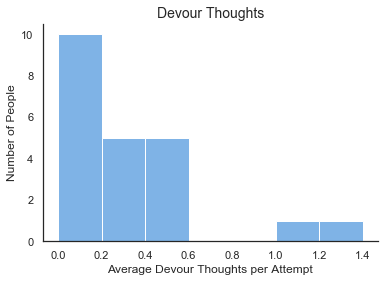

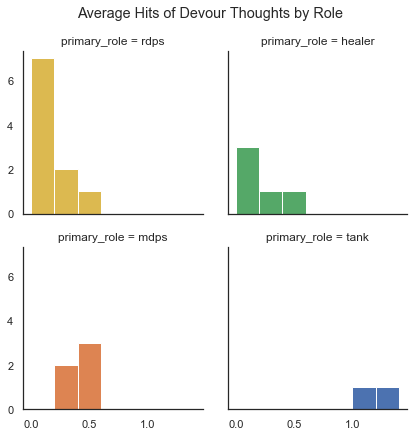

Mean is 0.345498 per attempt.
Median is 0.259600 per attempt.
Max attempts by player is 512.


In [143]:
bins = np.arange(0, 1.6, 0.2)
la.collect_stats(data=devour_thoughts, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Devour Thoughts', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=300, bins=bins)

<a id='anguish'></a>
### Anguish

- Spell ID: 309991
- 10 Sanity per hit

In [65]:
anguish = wl.damage_taken(api_key, master_list, 318771, boss_id=2344, hit_type='hitCount')

Player added: Earrl
Player added: Niccom
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Ølympius
Player added: Kopye
Player added: Irvaeryss
Player added: Shuxd
Player added: Toyqt
Player added: Petrøl
Player added: Mythrose
Player added: Apakulli
Player added: Divinance
Player added: Nockedloose
Player added: Cunegonde
Player added: Arkamani
Player added: Luthial
Player added: Onggor
Player added: Niccom
Player added: Divinance
Player added: Onggor
Player added: Shuxd
Player added: Irvaeryss
Player added: Voidsp
Player added: Lauly
Player added: Ayreia
Player added: Arkamani
Player added: Metonymy
Player added: Cunegonde
Player added: Earrl
Player added: Kopye
Player added: Mythrose
Player added: Apakulli
Player added: Petrøl
Player added: Toyqt
Player added: Nockedloose
Player added: Zodyhunt
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Divinance
Player added: Metonymy
Player added: Deviöus
Player added: Niccom
Player added: Inradhrill
Player

Player added: Divinance
Player added: Metonymy
Player added: Luthial
Player added: Irvaeryss
Player added: Ayreia
Player added: Apakullii
Player added: Nockedloose
Player added: Shuxd
Player added: Ølympius
Player added: Shadowbaine
Player added: Cunegonde
Player added: Kopye
Player added: Toyqt
Player added: Earrl
Player added: Lauly
Player added: Petrøl
Player added: Zodyhunt
Player added: Bobbydigital
Player added: Niccom
Player added: Mythrose
Player added: Zodyhunt
Player added: Metonymy
Player added: Shadowbaine
Player added: Ayreia
Player added: Owoo
Player added: Toyqt
Player added: Earrl
Player added: Onggor
Player added: Arkamani
Player added: Irvaeryss
Player added: Lauly
Player added: Dzkillingme
Player added: Nockedloose
Player added: Bobbydigital
Player added: Divinance
Player added: Petrøl
Player added: Shuxd
Player added: Voidsp
Player added: Niccom
Player added: Toyqt
Player added: Nockedloose
Player added: Earrl
Player added: Arkamani
Player added: Bobbydigital
Player

          player   hits  damage_taken  fight_count primary_role  av_count
19   Nockedloose   40.0     7291846.0          364         rdps  0.109890
21        Petrøl   59.0    10232851.0          512         rdps  0.115234
3         Ayreia   51.0     9075870.0          436       healer  0.116972
2       Arkamani   62.0    11383816.0          489         rdps  0.126789
17      Mythrose   72.0    12346318.0          499       healer  0.144289
13         Kopye   66.0    11425014.0          406         rdps  0.162562
12       Jampers   59.0     9436269.0          361       healer  0.163435
16      Metonymy   85.0    13593391.0          477         rdps  0.178197
30      Ølympius   69.0    12443384.0          362         rdps  0.190608
28      Zodyhunt   85.0    15411640.0          445         rdps  0.191011
0       Apakulli   69.0    11534300.0          337         rdps  0.204748
23   Shadowbaine  161.0    27507013.0          512         rdps  0.314453
24         Shuxd  155.0    21413937.0 

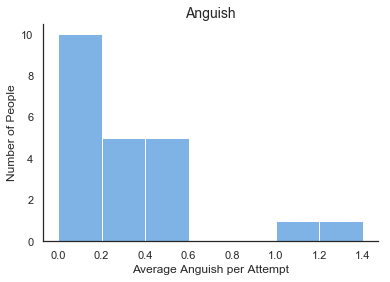

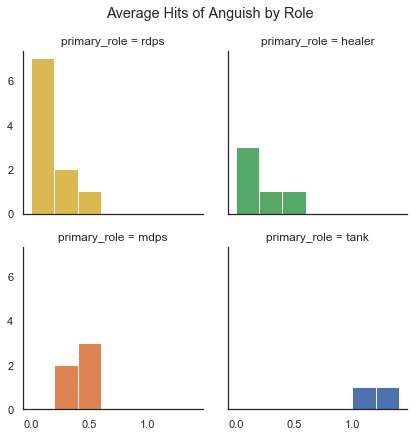

Mean is 0.345498 per attempt.
Median is 0.259600 per attempt.
Max attempts by player is 512.


In [135]:
bins=np.arange(0, 1.6, 0.2)
la.collect_stats(data=anguish, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Anguish', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=300, bins=bins)

<a id='corrupted'></a>
### Corrupted Viscera

- Spell ID: 318688
- 15 sanity per hit

In [102]:
corrupted_v = wl.damage_taken(api_key, master_list, 318688, boss_id=2344, hit_type='hitCount')

Player added: Bobbydigital
Player added: Divinance
Player added: Onggor
Player added: Zodyhunt
Player added: Nockedloose
Player added: Arkamani
Player added: Toyqt
Player added: Ayreia
Player added: Kopye
Player added: Apakulli
Player added: Cunegonde
Player added: Niccom
Player added: Irvaeryss
Player added: Earrl
Player added: Mythrose
Player added: Ølympius
Player added: Luthial
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Mythrose
Player added: Zodyhunt
Player added: Metonymy
Player added: Nockedloose
Player added: Voidsp
Player added: Petrøl
Player added: Cunegonde
Player added: Arkamani
Player added: Irvaeryss
Player added: Onggor
Player added: Lauly
Player added: Earrl
Player added: Kopye
Player added: Niccom
Player added: Apakulli
Player added: Divinance
Player added: Earrl
Player added: Luthial
Player added: Apakullii
Player added: Petrøl
Player added: Deviöus
Player added: Inradhrill
Player added: Ølympius
Player added: Lauly
Player added: Metonymy
Playe

Player added: Lauly
Player added: Niccom
Player added: Bobbydigital
Player added: Earrl
Player added: Zodyhunt
Player added: Nockedloose
Player added: Ayreia
Player added: Shuxd
Player added: Divinance
Player added: Cunegonde
Player added: Ølympius
Player added: Shadowbaine
Player added: Irvaeryss
Player added: Kopye
Player added: Toyqt
Player added: Metonymy
Player added: Arkamani
Player added: Luthial
Player added: Mythrose
Player added: Apakullii
Player added: Petrøl
Player added: Dzkillingme
Player added: Onggor
Player added: Petrøl
Player added: Niccom
Player added: Toyqt
Player added: Owoo
Player added: Irvaeryss
Player added: Mythrose
Player added: Metonymy
Player added: Zodyhunt
Player added: Shadowbaine
Player added: Earrl
Player added: Lauly
Player added: Shuxd
Player added: Nockedloose
Player added: Arkamani
Player added: Divinance
Player added: Ayreia
Player added: Bobbydigital
Player added: Voidsp
Player added: Ølympius
Player added: Mythrose
Player added: Ayreia
Player ad

          player   hits  damage_taken  fight_count primary_role  av_count
26         Toyqt   46.0    10283109.0          447         mdps  0.102908
7      Divinance   54.0     8449189.0          512         tank  0.105469
4   Bobbydigital   48.0    10458126.0          375         mdps  0.128000
9          Earrl   69.0    10616780.0          512         tank  0.134766
24         Shuxd   70.0    12657083.0          484         mdps  0.144628
28      Zodyhunt   72.0    16550797.0          445         rdps  0.161798
18        Niccom   72.0    15646559.0          438         mdps  0.164384
13         Kopye   71.0    15369756.0          406         rdps  0.174877
11     Irvaeryss   80.0    14676272.0          444         mdps  0.180180
16      Metonymy   95.0    19156490.0          477         rdps  0.199161
3         Ayreia   93.0    20514624.0          436       healer  0.213303
21        Petrøl  114.0    24682471.0          512         rdps  0.222656
2       Arkamani  115.0    26363995.0 

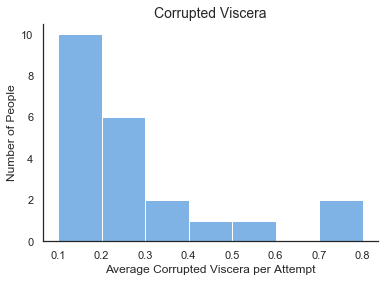

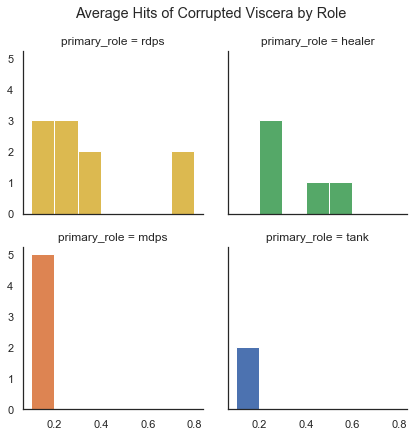

Mean is 0.275641 per attempt.
Median is 0.217980 per attempt.
Max attempts by player is 512.


In [136]:
bins = np.arange(0.1, 0.9, 0.1)
la.collect_stats(data=corrupted_v, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Corrupted Viscera', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=300, bins=bins)

<a id='burst'></a>
### Psychic Burst

- Spell ID: 318768
- 30 sanity per hit

In [104]:
psychic_burst = wl.damage_taken(api_key, master_list, 318768, boss_id=2344, hit_type='hitCount')

Player added: Shadowbaine
Player added: Zodyhunt
Player added: Bobbydigital
Player added: Onggor
Player added: Niccom
Player added: Ayreia
Player added: Irvaeryss
Player added: Toyqt
Player added: Divinance
Player added: Apakulli
Player added: Petrøl
Player added: Shuxd
Player added: Cunegonde
Player added: Earrl
Player added: Mythrose
Player added: Lauly
Player added: Apakulli
Player added: Zodyhunt
Player added: Irvaeryss
Player added: Voidsp
Player added: Shadowbaine
Player added: Earrl
Player added: Shuxd
Player added: Bobbydigital
Player added: Divinance
Player added: Cunegonde
Player added: Divinance
Player added: Irvaeryss
Player added: Ølympius
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Voidsp
Player added: Luthial
Player added: Shuxd
Player added: Divinance
Player added: Nockedloose
Player added: Arkamani
Player added: Cunegonde
Player added: Petrøl
Player added: Niccom
Player added: Kopye
Player added: Earrl
Player added: Lauly
Player added: Onggor
Pla

          player   hits  damage_taken  fight_count primary_role  av_count
26         Toyqt   46.0    10283109.0          447         mdps  0.102908
7      Divinance   54.0     8449189.0          512         tank  0.105469
4   Bobbydigital   48.0    10458126.0          375         mdps  0.128000
9          Earrl   69.0    10616780.0          512         tank  0.134766
24         Shuxd   70.0    12657083.0          484         mdps  0.144628
28      Zodyhunt   72.0    16550797.0          445         rdps  0.161798
18        Niccom   72.0    15646559.0          438         mdps  0.164384
13         Kopye   71.0    15369756.0          406         rdps  0.174877
11     Irvaeryss   80.0    14676272.0          444         mdps  0.180180
16      Metonymy   95.0    19156490.0          477         rdps  0.199161
3         Ayreia   93.0    20514624.0          436       healer  0.213303
21        Petrøl  114.0    24682471.0          512         rdps  0.222656
2       Arkamani  115.0    26363995.0 

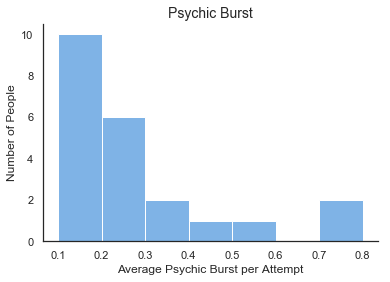

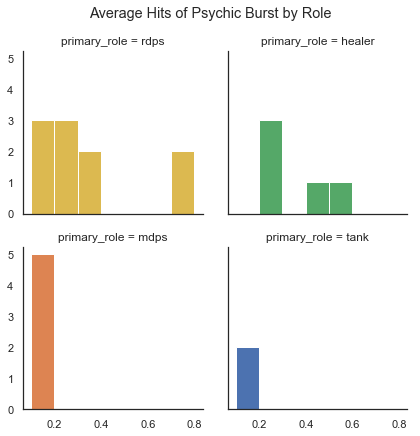

Mean is 0.275641 per attempt.
Median is 0.217980 per attempt.
Max attempts by player is 512.


In [137]:
bins = np.arange(0.1, 0.9, 0.1)
la.collect_stats(data=corrupted_v, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Psychic Burst', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=300, bins=bins)

<a id='flames'></a>
### Flames of Insanity

- Spell ID: 313793
- 15 Sanity per hit

In [75]:
flames_insanity = wl.damage_taken(api_key, master_list, 313793, boss_id=2344, hit_type='tickCount')

Player added: Arkamani
Player added: Niccom
Player added: Bobbydigital
Player added: Earrl
Player added: Petrøl
Player added: Irvaeryss
Player added: Toyqt
Player added: Petrøl
Player added: Irvaeryss
Player added: Divinance
Player added: Toyqt
Player added: Nockedloose
Player added: Irvaeryss
Player added: Bobbydigital
Player added: Petrøl
Player added: Irvaeryss
Player added: Divinance
Player added: Niccom
Player added: Mythrose
Player added: Kopye
Player added: Toyqt
Player added: Arkamani
Player added: Bobbydigital
Player added: Niccom
Player added: Earrl
Player added: Irvaeryss
Player added: Petrøl
Player added: Mythrose
Player added: Arkamani
Player added: Toyqt
Player added: Nockedloose
Player added: Bobbydigital
Player added: Irvaeryss
Player added: Niccom
Player added: Toyqt
Player added: Bobbydigital
Player added: Mythrose
Player added: Nockedloose
Player added: Arkamani
Player added: Irvaeryss
Player added: Bobbydigital
Player added: Niccom
Player added: Arkamani
Player adde

          player  hits  damage_taken  fight_count primary_role  av_count
0       Apakulli   0.0           0.0          337         rdps  0.000000
26         Toyqt   0.0     3674654.0          447         mdps  0.000000
24         Shuxd   0.0           0.0          484         mdps  0.000000
23   Shadowbaine   0.0           0.0          512         rdps  0.000000
16      Metonymy   0.0           0.0          477         rdps  0.000000
13         Kopye   0.0      129234.0          406         rdps  0.000000
12       Jampers   0.0           0.0          361       healer  0.000000
14         Lauly   0.0           0.0          367       healer  0.000000
5      Cunegonde   0.0           0.0          387         rdps  0.000000
3         Ayreia   0.0           0.0          436       healer  0.000000
30      Ølympius   0.0           0.0          362         rdps  0.000000
15       Luthial   1.0      184633.0          377       healer  0.002653
21        Petrøl   4.0     3445367.0          512  

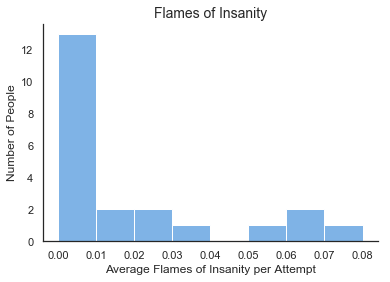

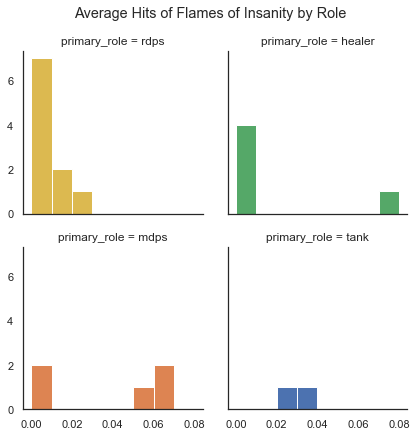

Mean is 0.017466 per attempt.
Median is 0.001326 per attempt.
Max attempts by player is 512.


In [138]:
bins = np.arange(0, 0.09, 0.01)
la.collect_stats(data=flames_insanity, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Flames of Insanity', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=300, bins=bins)

<a id='sanity'></a>
### All Unavoidable Sanity Loss

In [144]:
# Use first part of spell name because using _ to split
sanity_spells = {'flames':15, 
                 'psychic': 30, 
                 'corrupted': 15, 
                 'anguish':10, 
                 'devour':10}

from os import listdir
from os.path import isfile, join
sanity_files = [file for file in listdir('guild_awards') \
                if (isfile(join('guild_awards', file)) \
                    & file.endswith('analysis.csv')
                    & (file[18:].split('_')[0] in sanity_spells.keys()))]

In [145]:
sanity = pd.DataFrame({}, columns=['player', 'hits', 'damage_taken', 'fight_count', 'primary_role', 'av_count'])
for file in sanity_files:
    file_df = pd.read_csv(join('guild_awards', file), encoding='iso-8859-1')
    spell_begin = file[18:].split('_')[0]
    file_df['spell'] = spell_begin
    file_df['sanity_per_hit'] = sanity_spells[spell_begin]
    sanity = pd.concat([sanity, file_df], sort=False)

sanity['fight_count'] = sanity['fight_count'].astype(int)
sanity['sanity_loss'] = sanity['hits'] * sanity['sanity_per_hit']
total_sanity = pd.DataFrame(sanity.groupby('player')['sanity_loss'].sum())
total_sanity.columns = ['amount']

          player   amount  fight_count primary_role   av_count
13         Kopye   4515.0          406         rdps  11.120690
26         Toyqt   5010.0          447         mdps  11.208054
28      Zodyhunt   5030.0          445         rdps  11.303371
3         Ayreia   5205.0          436       healer  11.938073
21        Petrøl   6370.0          512         rdps  12.441406
16      Metonymy   5975.0          477         rdps  12.526205
24         Shuxd   6250.0          484         mdps  12.913223
19   Nockedloose   4835.0          364         rdps  13.282967
2       Arkamani   6535.0          489         rdps  13.364008
12       Jampers   5230.0          361       healer  14.487535
4   Bobbydigital   5595.0          375         mdps  14.920000
17      Mythrose   7995.0          499       healer  16.022044
18        Niccom   7300.0          438         mdps  16.666667
11     Irvaeryss   7985.0          444         mdps  17.984234
0       Apakulli   6645.0          337         rdps  19

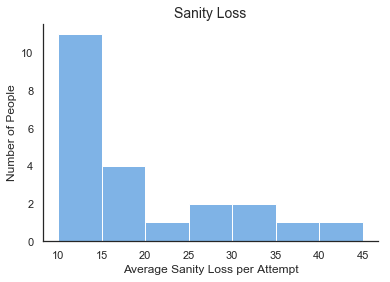

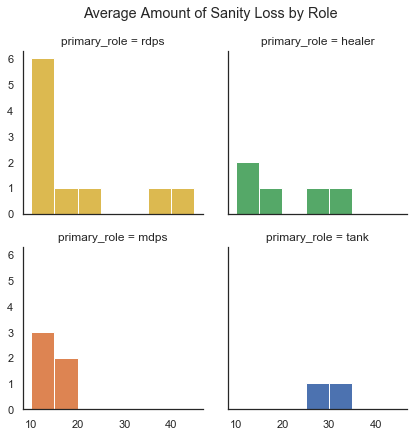

Mean is 19.575813 per attempt.
Median is 15.471022 per attempt.
Max attempts by player is 512.


In [146]:
bins = np.arange(10, 50, 5)
la.collect_stats(data=total_sanity, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Sanity Loss', 
                 analysis_columns=['amount'], min_attempts=300, bins=bins)

<a id='jf_dispells'></a>
### Dispells

Spell IDs:
- Priest: Purify (527), Mass Dispel (32375)
- Paladin: Cleanse (4987)
- Shaman: Purify Spirit (77130)
- Druid: Nature's Cure (88423)
- Monk: Detox (115450)

In [150]:
nzoth_dispells = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

dispell_ids = [527, 32375, 4987, 77130, 88423, 115450]

for spell_id in dispell_ids:
    try:
        print('\nSpell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2344)
        nzoth_dispells = pd.concat([nzoth_dispells, spell_df])
    except:
        continue


Spell Id: 527
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Luthial
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Luthial
Player added: Luthial
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Luthial
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Mythrose
Player added: 

Player added: Jampers

Spell Id: 115450
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly


          player  count  fight_count primary_role  av_count
3         Ayreia  560.0          436       healer  1.284404
15       Luthial  341.0          377       healer  0.904509
12       Jampers  309.0          361       healer  0.855956
14         Lauly  289.0          367       healer  0.787466
17      Mythrose  366.0          499       healer  0.733467
26         Toyqt   28.0          447         mdps  0.062640
28      Zodyhunt    0.0          445         rdps  0.000000
24         Shuxd    0.0          484         mdps  0.000000
23   Shadowbaine    0.0          512         rdps  0.000000
21        Petrøl    0.0          512         rdps  0.000000
19   Nockedloose    0.0          364         rdps  0.000000
18        Niccom    0.0          438         mdps  0.000000
0       Apakulli    0.0          337         rdps  0.000000
16      Metonymy    0.0          477         rdps  0.000000
2       Arkamani    0.0          489         rdps  0.000000
13         Kopye    0.0          406    

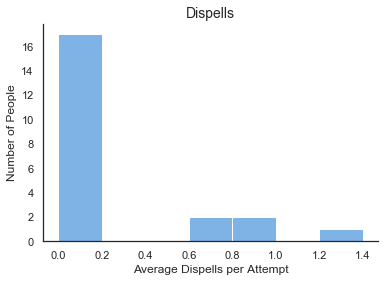

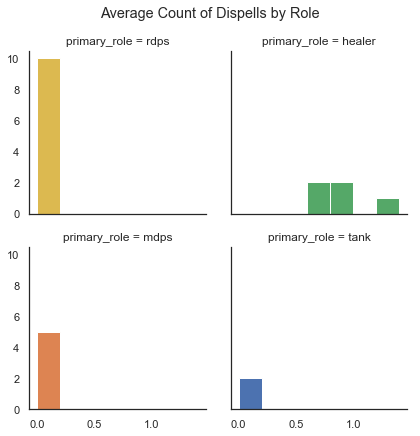

Mean is 0.210384 per attempt.
Median is 0.000000 per attempt.
Max attempts by player is 512.


In [153]:
bins = np.arange(0, 1.6, 0.2)
la.collect_stats(data=nzoth_dispells, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Dispells', 
                 analysis_columns=['count'], min_attempts=300, least=False, bins=bins)

<a id='evoke'></a>
### Evoke Anguish

Spell ID: 319348

In [155]:
evoke_anguish = wl.damage_taken(api_key, master_list, 319348, boss_id=2344, hit_type='tickCount')

Player added: Petrøl
Player added: Kopye
Player added: Zodyhunt
Player added: Irvaeryss
Player added: Toyqt
Player added: Divinance
Player added: Ølympius
Player added: Onggor
Player added: Arkamani
Player added: Cunegonde
Player added: Earrl
Player added: Ayreia
Player added: Shuxd
Player added: Apakulli
Player added: Mythrose
Player added: Nockedloose
Player added: Luthial
Player added: Niccom
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Petrøl
Player added: Shuxd
Player added: Mythrose
Player added: Divinance
Player added: Bobbydigital
Player added: Onggor
Player added: Zodyhunt
Player added: Voidsp
Player added: Nockedloose
Player added: Lauly
Player added: Cunegonde
Player added: Metonymy
Player added: Apakulli
Player added: Kopye
Player added: Arkamani
Player added: Shadowbaine
Player added: Irvaeryss
Player added: Ayreia
Player added: Metonymy
Player added: Arkamani
Player added: Petrøl
Player added: Toyqt
Player added: Lauly
Player added: Niccom
Player add

Player added: Petrøl
Player added: Bobbydigital
Player added: Luthial
Player added: Arkamani
Player added: Earrl
Player added: Mythrose
Player added: Metonymy
Player added: Kopye
Player added: Toyqt
Player added: Ølympius
Player added: Zodyhunt
Player added: Ayreia
Player added: Shadowbaine
Player added: Apakullii
Player added: Nockedloose
Player added: Divinance
Player added: Irvaeryss
Player added: Shuxd
Player added: Lauly
Player added: Cunegonde
Player added: Metonymy
Player added: Mythrose
Player added: Petrøl
Player added: Zodyhunt
Player added: Onggor
Player added: Shadowbaine
Player added: Kopye
Player added: Arkamani
Player added: Lauly
Player added: Apakullii
Player added: Toyqt
Player added: Niccom
Player added: Earrl
Player added: Owoo
Player added: Ayreia
Player added: Irvaeryss
Player added: Divinance
Player added: Ølympius
Player added: Nockedloose
Player added: Bobbydigital
Player added: Divinance
Player added: Luthial
Player added: Kopye
Player added: Cunegonde
Player 

          player    hits  damage_taken  fight_count primary_role  av_count
14         Lauly   782.0    94519328.0          367       healer  2.130790
28      Zodyhunt  1001.0   130054516.0          445         rdps  2.249438
2       Arkamani  1206.0   158886820.0          489         rdps  2.466258
11     Irvaeryss  1112.0   121347755.0          444         mdps  2.504505
26         Toyqt  1165.0   136231820.0          447         mdps  2.606264
19   Nockedloose   980.0   126862564.0          364         rdps  2.692308
4   Bobbydigital  1026.0   126678022.0          375         mdps  2.736000
18        Niccom  1211.0   152691995.0          438         mdps  2.764840
24         Shuxd  1397.0   141686923.0          484         mdps  2.886364
16      Metonymy  1404.0   171725341.0          477         rdps  2.943396
17      Mythrose  1494.0   195450121.0          499       healer  2.993988
23   Shadowbaine  1547.0   196036596.0          512         rdps  3.021484
9          Earrl  1567.0 

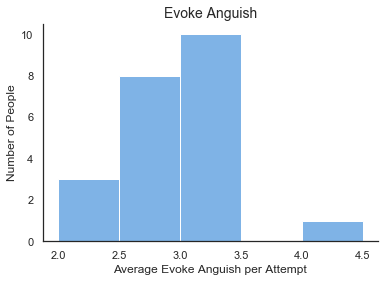

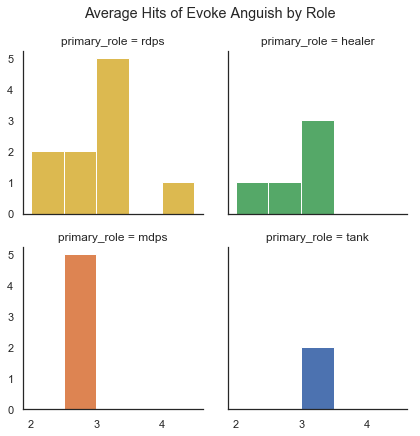

Mean is 2.971391 per attempt.
Median is 3.007736 per attempt.
Max attempts by player is 512.


In [157]:
bins = np.arange(2, 5, 0.5)
la.collect_stats(data=evoke_anguish, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Evoke Anguish', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=300, bins=bins)

<a id='paranoia'></a>
### Paranoia

Spell ID: 309978

In [160]:
paranoia = wl.damage_taken(api_key, master_list, 309978, boss_id=2344, hit_type='hitCount')

Player added: Toyqt
Player added: Kopye
Player added: Shadowbaine
Player added: Zodyhunt
Player added: Petrøl
Player added: Ølympius
Player added: Cunegonde
Player added: Onggor
Player added: Shuxd
Player added: Luthial
Player added: Apakulli
Player added: Bobbydigital
Player added: Irvaeryss
Player added: Nockedloose
Player added: Mythrose
Player added: Arkamani
Player added: Ayreia
Player added: Niccom
Player added: Zodyhunt
Player added: Bobbydigital
Player added: Arkamani
Player added: Voidsp
Player added: Mythrose
Player added: Cunegonde
Player added: Onggor
Player added: Apakulli
Player added: Kopye
Player added: Niccom
Player added: Shuxd
Player added: Petrøl
Player added: Ayreia
Player added: Lauly
Player added: Toyqt
Player added: Metonymy
Player added: Irvaeryss
Player added: Nockedloose
Player added: Shadowbaine
Player added: Inradhrill
Player added: Apakullii
Player added: Luthial
Player added: Niccom
Player added: Shuxd
Player added: Cunegonde
Player added: Toyqt
Player ad

Player added: Arkamani
Player added: Lauly
Player added: Bobbydigital
Player added: Kopye
Player added: Apakulli
Player added: Ayreia
Player added: Mythrose
Player added: Shadowbaine
Player added: Petrøl
Player added: Irvaeryss
Player added: Metonymy
Player added: Toyqt
Player added: Owoo
Player added: Zodyhunt
Player added: Shuxd
Player added: Niccom
Player added: Cunegonde
Player added: Luthial
Player added: Lauly
Player added: Arkamani
Player added: Ayreia
Player added: Aphy
Player added: Cunegonde
Player added: Toyqt
Player added: Ølympius
Player added: Ðestructiön
Player added: Irvaeryss
Player added: Shuxd
Player added: Thelyne
Player added: Shadowbaine
Player added: Apakullii
Player added: Inradhrill
Player added: Petrøl
Player added: Mythrose
Player added: Niccom
Player added: Metonymy
Player added: Bobbydigital
Player added: Irvaeryss
Player added: Luthial
Player added: Cunegonde
Player added: Metonymy
Player added: Ølympius
Player added: Mythrose
Player added: Zodyhunt
Player

          player    hits  damage_taken  fight_count primary_role  av_count
9          Earrl     0.0           0.0          512         tank  0.000000
7      Divinance     0.0           0.0          512         tank  0.000000
24         Shuxd  2444.0    83378929.0          484         mdps  5.049587
14         Lauly  2210.0    78721685.0          367       healer  6.021798
13         Kopye  2496.0   109358354.0          406         rdps  6.147783
3         Ayreia  2810.0   110779644.0          436       healer  6.444954
21        Petrøl  3319.0   156051837.0          512         rdps  6.482422
16      Metonymy  3105.0   142773730.0          477         rdps  6.509434
11     Irvaeryss  2932.0   118009879.0          444         mdps  6.603604
18        Niccom  2904.0   134919313.0          438         mdps  6.630137
28      Zodyhunt  3003.0   135824034.0          445         rdps  6.748315
17      Mythrose  3368.0   158580228.0          499       healer  6.749499
2       Arkamani  3304.0 

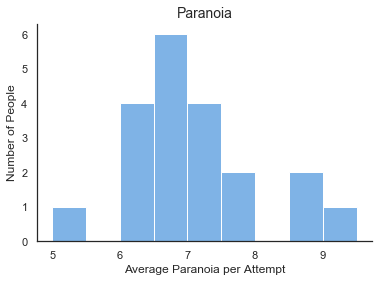

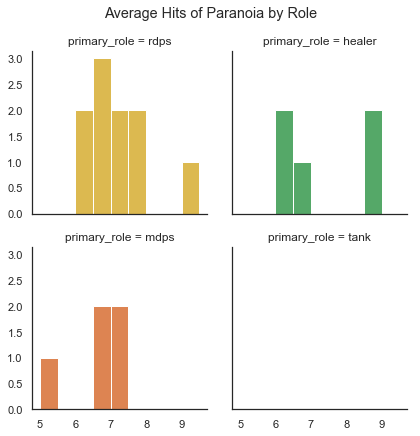

Mean is 6.392066 per attempt.
Median is 6.748907 per attempt.
Max attempts by player is 512.


In [162]:
bins = np.arange(5, 10, 0.5)
la.collect_stats(data=paranoia, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Paranoia', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=300, bins=bins)

<a id='glare'></a>
### Stupefying Glare

Spell ID: 318976

In [163]:
glare = wl.damage_taken(api_key, master_list, 318976, boss_id=2344, hit_type='hitCount')

Player added: Irvaeryss
Player added: Mythrose
Player added: Zodyhunt
Player added: Divinance
Player added: Arkamani
Player added: Cunegonde
Player added: Nockedloose
Player added: Shadowbaine
Player added: Earrl
Player added: Petrøl
Player added: Zodyhunt
Player added: Mythrose
Player added: Divinance
Player added: Earrl
Player added: Inradhrill
Player added: Ølympius
Player added: Shuxd
Player added: Petrøl
Player added: Apakullii
Player added: Ayreia
Player added: Earrl
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Toyqt
Player added: Arkamani
Player added: Cunegonde
Player added: Kopye
Player added: Luthial
Player added: Nockedloose
Player added: Zodyhunt
Player added: Mythrose
Player added: Onggor
Player added: Metonymy
Player added: Shadowbaine
Player added: Petrøl
Player added: Apakullii
Player added: Zodyhunt
Player added: Mythrose
Player added: Niccom
Player added: Petrøl
Player added: Earrl
Player added: Arkamani
Player added: Divinance
Player added: Ayre

          player  hits  damage_taken  fight_count primary_role  av_count
18        Niccom   6.0     2499232.0          438         mdps  0.013699
12       Jampers   5.0     1903996.0          361       healer  0.013850
26         Toyqt   8.0     2573363.0          447         mdps  0.017897
7      Divinance  11.0     3389058.0          512         tank  0.021484
0       Apakulli   9.0     3757225.0          337         rdps  0.026706
16      Metonymy  14.0     5351868.0          477         rdps  0.029350
14         Lauly  11.0     4169113.0          367       healer  0.029973
28      Zodyhunt  14.0     5714747.0          445         rdps  0.031461
15       Luthial  12.0     4819678.0          377       healer  0.031830
11     Irvaeryss  15.0     5326841.0          444         mdps  0.033784
2       Arkamani  17.0     6997774.0          489         rdps  0.034765
24         Shuxd  17.0     5262502.0          484         mdps  0.035124
23   Shadowbaine  18.0     7235744.0          512  

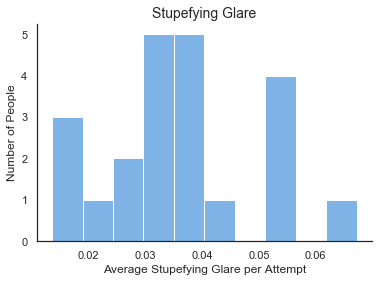

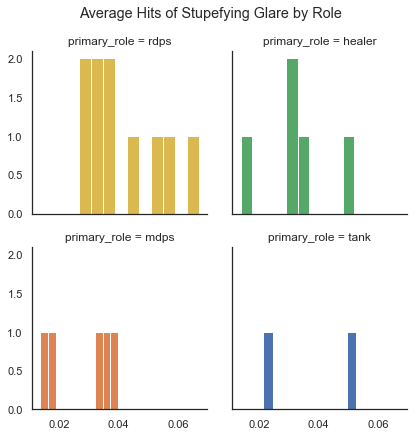

Mean is 0.036175 per attempt.
Median is 0.034944 per attempt.
Max attempts by player is 512.


In [164]:
bins = None#np.arange(5, 10, 0.5)
la.collect_stats(data=glare, master_list=master_list, player_list=player_list, 
                 boss_name='N\'Zoth the Corruptor', boss_id=2344, spell_name='Stupefying Glare', 
                 analysis_columns=['hits', 'damage_taken'], min_attempts=300, bins=bins)

<a id='overall'></a>
## Overall

<a id='pots'></a>
### Most Pots Used

Spell IDs:
- Potion of Focused Resolve: 298317
- Potion of Unbridled Fury: 300714
- ~~Potion of Bursting Blood: 251316~~
- ~~Potion of Rising Death: 269853~~
- Battle Potion of Agility: 279152
- Battle Potion of Intellect: 279151
- Battle Potion of Strength: 279153
- Superior Battle Potion of Intellect: 298152
- Superior Battle Potion of Agility: 298146
- Superior Battle Potion of Strength: 168500
- Potion of Replinishment: 252753 (is a debuff)
- Coastal Mana Potion: 250871 (is a cast)

In [20]:
pot_buffs = [298317, 300714, 279152, 279151, 279153, 298152, 298146, 168500]

pots = pd.DataFrame([], 
                    columns=['log_id', 'spell_id', 'player', 'duration', 'uses'])

for spell_id in pot_buffs:
    try:
        print('\nSpell Id:', spell_id)
        spell_df = wl.buff_duration(api_key, master_list, spell_id)
        pots = pd.concat([pots, spell_df])
    except:
        continue


Spell Id: 298317
Player added: Hocc
Player added: Niccom
Player added: Bobbydigital
Player added: Niccom
Player added: Niccom
Player added: Inradhrill
Player added: Niccom
Player added: Bobbydigital
Player added: Bobbydigital
Player added: Niccom
Player added: Bobbydigital
Player added: Niccom
Player added: Niccom
Player added: Bobbydigital
Player added: Niccom
Player added: Thelyne
Player added: Bobbydigital
Player added: Niccom
Player added: Niccom
Player added: Bobbydigital
Player added: Bobbydigital
Player added: Niccom
Player added: Niccom
Player added: Bobbydigital
Player added: Bobbydigital
Player added: Niccom
Player added: Dzkillingme
Player added: Bobbydigital
Player added: Niccom
Player added: Niccom
Player added: Inradhrill
Player added: Hocc
Player added: Bobbydigital
Player added: Niccom
Player added: Bobbydigital
Player added: Bobbydigital
Player added: Niccom
Player added: Hocc
Player added: Dzkillingme
Player added: Bobbydigital
Player added: Niccom
Player added: Bobb

Player added: Owoo
Player added: Kopyeqt
Player added: Dzkillingme
Player added: Nagmir
Player added: Petrøl
Player added: Niccom
Player added: Irvaeryss
Player added: Earrl
Player added: Metonymy
Player added: Stradlock
Player added: Divinance
Player added: Lauly
Player added: Nockedloose
Player added: Ølympius
Player added: Voidsp
Player added: Toyqt
Player added: Tahvee
Player added: Hocc
Player added: Shadowbaine
Player added: Cunegonde
Player added: Arkamani
Player added: Toyqt
Player added: Apakulli
Player added: Bobbydigital
Player added: Cunegonde
Player added: Earrl
Player added: Voidsp
Player added: Divinance
Player added: Zodyhunt
Player added: Irvaeryss
Player added: Shuxd
Player added: Shadowbaine
Player added: Nockedloose
Player added: Niccom
Player added: Shuxd
Player added: Ølympius
Player added: Irvaeryss
Player added: Apakullii
Player added: Cunegonde
Player added: Nockedloose
Player added: Divinance
Player added: Earrl
Player added: Shadowbaine
Player added: Deviöus


Player added: Nockedloose
Player added: Shadowbaine
Player added: Metonymy
Player added: Bobbydigital
Player added: Earrl
Player added: Tahvee
Player added: Petrøl
Player added: Irvaeryss
Player added: Hocc
Player added: Divinance
Player added: Cunegonde
Player added: Niccom
Player added: Deptisaurus
Player added: Dzkillingme
Player added: Voidsp
Player added: Toyqt
Player added: Nagmir
Player added: Kopyeqt
Player added: Divinance
Player added: Shadowbaine
Player added: Bobbydigital
Player added: Owoo
Player added: Nockedloose
Player added: Cunegonde
Player added: Toyqt
Player added: Lauly
Player added: Ølympius
Player added: Earrl
Player added: Apakulli
Player added: Shuxd
Player added: Zodyhunt
Player added: Arkamani
Player added: Shuxd
Player added: Divinance
Player added: Owoo
Player added: Nockedloose
Player added: Zodyhunt
Player added: Shadowbaine
Player added: Ølympius
Player added: Cunegonde
Player added: Arkamani
Player added: Toyqt
Player added: Cunegonde
Player added: Shux

Player added: Dzkillingme
Player added: Metonymy
Player added: Divinance
Player added: Kopyeqt
Player added: Shadowbaine
Player added: Nockedloose
Player added: Lauly
Player added: Corowovirus
Player added: Earrl
Player added: Voidsp
Player added: Ølympius
Player added: Stradlock
Player added: Toyqt
Player added: Irvaeryss
Player added: Petrøl
Player added: Divinance
Player added: Cunegonde
Player added: Voidsp
Player added: Dzkillingme
Player added: Atallstalker
Player added: Toyqt
Player added: Petrøl
Player added: Stradlock
Player added: Earrl
Player added: Hocc
Player added: Metonymy
Player added: Irvaeryss
Player added: Nockedloose
Player added: Moomir
Player added: Ølympius
Player added: Kopyeqt
Player added: Irvaeryss
Player added: Divinance
Player added: Kopyeqt
Player added: Ølympius
Player added: Metonymy
Player added: Niccom
Player added: Bobbydigital
Player added: Toyqt
Player added: Owoo
Player added: Stradlock
Player added: Shadowbaine
Player added: Nockedloose
Player add

Player added: Cunegonde
Player added: Ølympius
Player added: Toyqt
Player added: Petrøl
Player added: Divinance
Player added: Shuxd
Player added: Shadowbaine
Player added: Voidsp
Player added: Zodyhunt
Player added: Earrl
Player added: Arkamani
Player added: Apakulli
Player added: Divinance
Player added: Corowovirus
Player added: Hocc
Player added: Bobbydigital
Player added: Ølympius
Player added: Toyqt
Player added: Metonymy
Player added: Stradlock
Player added: Irvaeryss
Player added: Nockedloose
Player added: Lauly
Player added: Petrøl
Player added: Cunegonde
Player added: Onggor
Player added: Dzkillingme
Player added: Kopyeqt
Player added: Niccom
Player added: Earrl
Player added: Voidsp
Player added: Tahvee
Player added: Shadowbaine
Player added: Irvaeryss
Player added: Nagmir
Player added: Petrøl
Player added: Divinance
Player added: Onggor
Player added: Nockedloose
Player added: Bobbydigital
Player added: Hocc
Player added: Kopyeqt
Player added: Earrl
Player added: Ølympius
Playe


Spell Id: 279151
Player added: Voidsp

Spell Id: 279153


Player added: Hocc

Spell Id: 298152
Player added: Kopye
Player added: Petrøl
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Petrøl
Player added: Metonymy
Player added: Metonymy
Player added: Kopye
Player added: Petrøl
Player added: Lauly
Player added: Petrøl
Player added: Metonymy
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Stradlock
Player added: Kopye
Player added: Petrøl
Player added: Metonymy
Player added: Lauly
Player added: Metonymy
Player added: Petrøl
Player added: Kopye
Player added: Metonymy
Player added: Kopye
Player added: Premierpumpr
Player added: Petrøl
Player added: Metonymy
Player added: Metonymy
Player added: Kopye
Player added: Lauly
Player added: Lauly
Player added: Kopye
Player added: Metonymy
Player added: Petrøl
Player added: Lauly
Player added: Lauly
Player added: Metonymy
Player added: Petrøl
Player added: Petrøl
Player added: Metonymy
Player added: Lauly
Player added: Petrøl
Player added: Ølympius
Playe

Player added: Petrøl
Player added: Metonymy
Player added: Lauly
Player added: Kopye
Player added: Lauly
Player added: Metonymy
Player added: Petrøl
Player added: Kopye
Player added: Lauly
Player added: Petrøl
Player added: Lauly
Player added: Metonymy
Player added: Metonymy
Player added: Lauly
Player added: Stradlock
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Mystrah
Player added: Lauly
Player added: Petrøl
Player added: Metonymy
Player added: Apakulli
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Metonymy
Player added: Kopye

Spell Id: 298146
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Nockedloose
Player added: Nockedloose
Player added: Earrl
Player added: Nockedloose
Player added: Earrl
Player added: Nockedloose
Player added: Earrl
Player added: Nockedloose
Player added: Earrl
Player added: Earrl
Player added: Apakullii
Player added: Earrl
Player added: Zodyhunt
Player added: Nockedloose
Player a

In [21]:
replenishment = wl.buff_duration(api_key, master_list, 252753, buff=False)

Player added: Luthial
Player added: Lauly
Player added: Luthial
Player added: Ayreia
Player added: Lauly
Player added: Mythrose
Player added: Onggor
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Lauly
Player added: Mythrose
Player added: Ayreia
Player added: Luthial
Player added: Mythrose
Player added: Luthial
Player added: Ayreia
Player added: Ayreia
Player added: Onggor
Player added: Luthial
Player added: Lauly
Player added: Luthial
Player added: Jampers
Player added: Ayreia
Player added: Luthial
Player added: Lauly
Player added: Luthial
Player added: Ayreia
Player added: Lauly
Player added: Lauly
Player added: Onggor
Player added: Ayreia
Player added: Luthial
Player added: Luthial
Player added: Onggor
Player added: Luthial
Player added: Lauly
Player added: Luthial
Player added: Ayreia
Player added: Luthial
Player added: Ayreia
Player added: Lauly
Player added: Mythrose
Player added: Onggor
Player added: Luthial
Player added: Lauly
Player added: Lauly
Play

In [22]:
mana = wl.cast_count(api_key, master_list, 250871)

Player added: Mythrose
Player added: Toyqt
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Mythrose
Player added: Ayreia
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Ayreia
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Luthial
Player added: Mythrose
Player added: Ayreia
Player added: Mythrose
Player added: Luthial
Player added: Mythrose
Player added: Mythrose
Player added: Mythrose
Player added: Mythrose
Player added: Luthial
Player added: Luthial
Player added: Mythrose
Player added: Luthial
Player added: Luthial
Player added

In [23]:
mana['duration'] = np.nan
mana.columns = ['log_id', 'spell_id', 'player', 'duration', 'uses']

In [24]:
pots = pd.concat([pots, replenishment, mana])

          player  uses  fight_count primary_role  av_count
33         Shuxd  1053        697.0         mdps  1.510760
26   Nockedloose  1396       1053.0         rdps  1.325736
28        Petrøl  1954       1507.0         rdps  1.296616
0       Apakulli   893        705.0         rdps  1.266667
39        Voidsp  1205        992.0         rdps  1.214718
37         Toyqt  1345       1147.0         mdps  1.172624
7      Cunegonde  1229       1053.0         rdps  1.167142
20      Metonymy  1663       1470.0         rdps  1.131293
43      Ølympius  1347       1199.0         rdps  1.123436
2       Arkamani   727        648.0         rdps  1.121914
10     Divinance  1641       1486.0         tank  1.104307
32   Shadowbaine  1471       1334.0         rdps  1.102699
41      Zodyhunt   606        553.0         rdps  1.095841
18         Lauly  1136       1061.0       healer  1.070688
17         Kopye  1271       1226.0         rdps  1.036705
12         Earrl  1560       1508.0         tank  1.0344

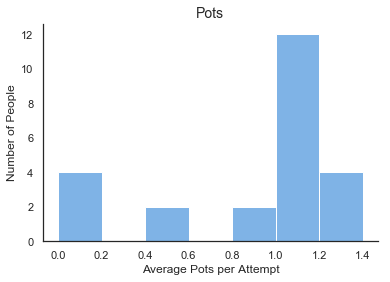

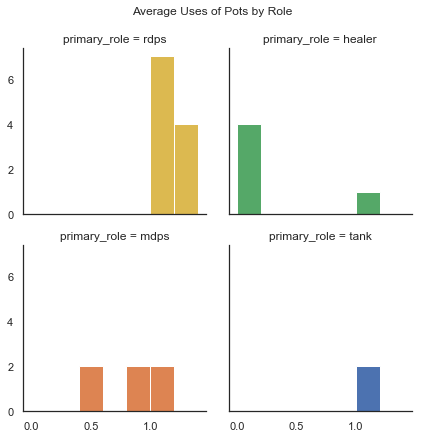

Mean is 0.915434 per attempt.
Median is 1.095841 per attempt.
Max attempts by player is 1508.0.


In [46]:
bins = np.arange(0, 1.6, 0.2)
la.collect_stats(data=pots, master_list=master_list, player_list=player_list, 
                 boss_name="Overall", boss_id=None, spell_name="Pots", 
                 analysis_columns=['uses'], min_attempts=100, least=False, bins=bins)

<a id='healthstones'></a>
### Most Healthstones/pots
IDs:
- Healthstone: 6262
- Coastal Healing Potion: 250870

In [28]:
stone = wl.cast_count(api_key, master_list, 6262)

Player added: Nockedloose
Player added: Toyqt
Player added: Onggor
Player added: Petrøl
Player added: Luthial
Player added: Kopye
Player added: Shadowbaine
Player added: Divinance
Player added: Ølympius
Player added: Arkamani
Player added: Earrl
Player added: Cunegonde
Player added: Apakulli
Player added: Zodyhunt
Player added: Shuxd
Player added: Ayreia
Player added: Bobbydigital
Player added: Niccom
Player added: Divinance
Player added: Dzkillingme
Player added: Nagmir
Player added: Kopyeqt
Player added: Lauly
Player added: Ølympius
Player added: Mythrose
Player added: Cunegonde
Player added: Niccom
Player added: Earrl
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Metonymy
Player added: Voidsp
Player added: Toyqt
Player added: Hocc
Player added: Petrøl
Player added: Nockedloose
Player added: Tahvee
Player added: Irvaeryss
Player added: Onggor
Player added: Toyqt
Player added: Mythrose
Player added: Tahvee
Player added: Kopyeqt
Player added: Niccom
Player added: N

Player added: Onggor
Player added: Ølympius
Player added: Cunegonde
Player added: Apakulli
Player added: Owoo
Player added: Shuxd
Player added: Niccom
Player added: Lauly
Player added: Mythrose
Player added: Tahvee
Player added: Bobbydigital
Player added: Voidsp
Player added: Divinance
Player added: Ayreia
Player added: Metonymy
Player added: Petrøl
Player added: Luthial
Player added: Irvaeryss
Player added: Earrl
Player added: Kopyeqt
Player added: Toyqt
Player added: Shadowbaine
Player added: Deviöus
Player added: Ayreia
Player added: Apakullii
Player added: Earrl
Player added: Inradhrill
Player added: Toyqt
Player added: Petrøl
Player added: Niccom
Player added: Metonymy
Player added: Ølympius
Player added: Shuxd
Player added: Arkamani
Player added: Shadowbaine
Player added: Kopye
Player added: Jampers
Player added: Mythrose
Player added: Earrl
Player added: Hocc
Player added: Ølympius
Player added: Petrøl
Player added: Metonymy
Player added: Nagmir
Player added: Dzkillingme
Player 

Player added: Hocc
Player added: Ølympius
Player added: Rázõr
Player added: Mythrose
Player added: Kopyeqt
Player added: Shadowbaine
Player added: Bobbydigital
Player added: Divinance
Player added: Earrl
Player added: Voidsp
Player added: Onggor
Player added: Niccom
Player added: Atallstalker
Player added: Moomir
Player added: Nockedloose
Player added: Hocc
Player added: Luthial
Player added: Lauly
Player added: Irvaeryss
Player added: Apakulli
Player added: Shadowbaine
Player added: Mythrose
Player added: Divinance
Player added: Onggor
Player added: Voidsp
Player added: Niccom
Player added: Toyqt
Player added: Petrøl
Player added: Owoo
Player added: Dzkillingme
Player added: Shuxd
Player added: Metonymy
Player added: Cunegonde
Player added: Earrl
Player added: Cunegonde
Player added: Ayreia
Player added: Jampers
Player added: Ølympius
Player added: Niccom
Player added: Petrøl
Player added: Inradhrill
Player added: Metonymy
Player added: Arkamani
Player added: Apakullii
Player added: T

Player added: Metonymy
Player added: Divinance
Player added: Apakulli
Player added: Zhooty
Player added: Niccom
Player added: Mythrose
Player added: Cunegonde
Player added: Bobbydigital
Player added: Luthial
Player added: Nockedloose
Player added: Petrøl
Player added: Ayreia
Player added: Stradlock
Player added: Onggor
Player added: Irvaeryss
Player added: Voidsp
Player added: Shadowbaine
Player added: Shuxd
Player added: Hocc
Player added: Nagmir
Player added: Aphy
Player added: Petrøl
Player added: Niccom
Player added: Ayreia
Player added: Luthial
Player added: Ølympius
Player added: Thelyne
Player added: Inradhrill
Player added: Apakullii
Player added: Cunegonde
Player added: Earrl
Player added: Shadowbaine
Player added: Arkamani
Player added: Ðestructiön
Player added: Toyqt
Player added: Mythrose
Player added: Shuxd
Player added: Bobbydigital
Player added: Irvaeryss
Player added: Ølympius
Player added: Apakullii
Player added: Metonymy
Player added: Petrøl
Player added: Shuxd
Player

Player added: Irvaeryss
Player added: Toyqt
Player added: Ayreia
Player added: Mythrose
Player added: Petrøl
Player added: Owoo
Player added: Ølympius
Player added: Metonymy
Player added: Shadowbaine
Player added: Kopye
Player added: Arkamani
Player added: Bobbydigital
Player added: Shuxd
Player added: Niccom
Player added: Onggor
Player added: Divinance
Player added: Earrl
Player added: Bobbydigital
Player added: Ølympius
Player added: Niccom
Player added: Owoo
Player added: Earrl
Player added: Shuxd
Player added: Shadowbaine
Player added: Metonymy
Player added: Arkamani
Player added: Irvaeryss
Player added: Divinance
Player added: Kopye
Player added: Mythrose
Player added: Ayreia
Player added: Nockedloose
Player added: Voidsp
Player added: Zodyhunt
Player added: Petrøl
Player added: Lauly
Player added: Metonymy
Player added: Ølympius
Player added: Mythrose
Player added: Nockedloose
Player added: Hocc
Player added: Stradlock
Player added: Divinance
Player added: Bobbydigital
Player add

In [29]:
heal_pots = wl.cast_count(api_key, master_list, 250870)

Player added: Dzkillingme
Player added: Dzkillingme


In [32]:
new_heal_pot = wl.cast_count(api_key, master_list, 301308)

Player added: Niccom
Player added: Apakulli
Player added: Nockedloose
Player added: Toyqt
Player added: Luthial
Player added: Petrøl
Player added: Kopye
Player added: Shuxd
Player added: Zodyhunt
Player added: Divinance
Player added: Ølympius
Player added: Bobbydigital
Player added: Cunegonde
Player added: Petrøl
Player added: Irvaeryss
Player added: Tahvee
Player added: Metonymy
Player added: Divinance
Player added: Mythrose
Player added: Nagmir
Player added: Bobbydigital
Player added: Nockedloose
Player added: Toyqt
Player added: Shadowbaine
Player added: Ølympius
Player added: Kopyeqt
Player added: Niccom
Player added: Lauly
Player added: Hocc
Player added: Earrl
Player added: Ølympius
Player added: Earrl
Player added: Shadowbaine
Player added: Hocc
Player added: Lauly
Player added: Voidsp
Player added: Toyqt
Player added: Kopyeqt
Player added: Nockedloose
Player added: Stradlock
Player added: Irvaeryss
Player added: Nagmir
Player added: Owoo
Player added: Petrøl
Player added: Nicco

Player added: Nockedloose
Player added: Shadowbaine
Player added: Niccom
Player added: Tahvee
Player added: Nagmir
Player added: Divinance
Player added: Petrøl
Player added: Toyqt
Player added: Mythrose
Player added: Cunegonde
Player added: Kopyeqt
Player added: Bobbydigital
Player added: Hocc
Player added: Shadowbaine
Player added: Bobbydigital
Player added: Cunegonde
Player added: Luthial
Player added: Hocc
Player added: Atallstalker
Player added: Stradlock
Player added: Petrøl
Player added: Uwao
Player added: Ølympius
Player added: Toyqt
Player added: Lauly
Player added: Onggor
Player added: Kopyeqt
Player added: Earrl
Player added: Divinance
Player added: Nockedloose
Player added: Metonymy
Player added: Owoo
Player added: Toyqt
Player added: Petrøl
Player added: Tahvee
Player added: Voidsp
Player added: Divinance
Player added: Nagmir
Player added: Hocc
Player added: Lauly
Player added: Bobbydigital
Player added: Mythrose
Player added: Deptisaurus
Player added: Luthial
Player added:

Player added: Atallstalker
Player added: Lauly
Player added: Bobbydigital
Player added: Owoo
Player added: Seghor
Player added: Petrøl
Player added: Divinance
Player added: Rázõr
Player added: Cunegonde
Player added: Moomir
Player added: Hocc
Player added: Toyqt
Player added: Kopyeqt
Player added: Stradlock
Player added: Earrl
Player added: Niccom
Player added: Ølympius
Player added: Mystrah
Player added: Metonymy
Player added: Luthial
Player added: Nockedloose
Player added: Petrøl
Player added: Lauly
Player added: Bobbydigital
Player added: Divinance
Player added: Stradlock
Player added: Irvaeryss
Player added: Mythrose
Player added: Earrl
Player added: Voidsp
Player added: Nockedloose
Player added: Shadowbaine
Player added: Corowovirus
Player added: Niccom
Player added: Luthial
Player added: Kopyeqt
Player added: Toyqt
Player added: Metonymy
Player added: Earrl
Player added: Toyqt
Player added: Kopyeqt
Player added: Luthial
Player added: Ølympius
Player added: Voidsp
Player added: Ow

Player added: Metonymy
Player added: Petrøl
Player added: Owoo
Player added: Lauly
Player added: Mythrose
Player added: Nockedloose
Player added: Ølympius
Player added: Divinance
Player added: Nagmir
Player added: Luthial
Player added: Kopyeqt
Player added: Voidsp
Player added: Apakulli
Player added: Toyqt
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Niccom
Player added: Toyqt
Player added: Shuxd
Player added: Arkamani
Player added: Petrøl
Player added: Zodyhunt
Player added: Earrl
Player added: Divinance
Player added: Apakulli
Player added: Lauly
Player added: Bobbydigital
Player added: Ølympius
Player added: Niccom
Player added: Niccom
Player added: Earrl
Player added: Toyqt
Player added: Onggor
Player added: Corowovirus
Player added: Bobbydigital
Player added: Ølympius
Player added: Mythrose
Player added: Metonymy
Player added: Voidsp
Player added: Divinance
Player added: Stradlock
Player added: Kopyeqt
Player added: Lauly
Player added: Hocc
Player added: Nocke

In [35]:
health_casts = pd.concat([stone, heal_pots, new_heal_pot])

          player  count  fight_count primary_role  av_count
5   Bobbydigital   1061       1264.0         mdps  0.839399
0       Apakulli    574        705.0         rdps  0.814184
17         Kopye    806       1226.0         rdps  0.657423
28        Petrøl    977       1507.0         rdps  0.648308
33         Shuxd    450        697.0         mdps  0.645624
25        Niccom    846       1312.0         mdps  0.644817
37         Toyqt    737       1147.0         mdps  0.642546
11   Dzkillingme    340        615.0         mdps  0.552846
27          Owoo    352        662.0         mdps  0.531722
18         Lauly    488       1061.0       healer  0.459943
43      Ølympius    530       1199.0         rdps  0.442035
26   Nockedloose    457       1053.0         rdps  0.433998
32   Shadowbaine    547       1334.0         rdps  0.410045
41      Zodyhunt    202        553.0         rdps  0.365280
10     Divinance    513       1486.0         tank  0.345222
39        Voidsp    341        992.0    

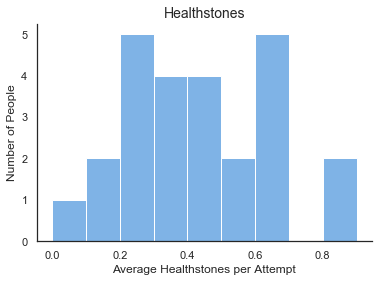

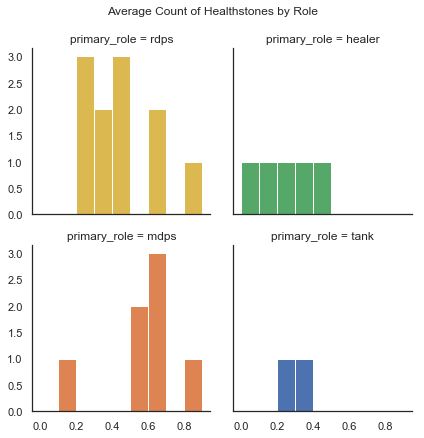

Mean is 0.431886 per attempt.
Median is 0.410045 per attempt.
Max attempts by player is 1508.0.


In [47]:
bins = np.arange(0, 1, 0.1)
la.collect_stats(data=health_casts, master_list=master_list, player_list=player_list, 
                 boss_name="Overall", boss_id=None, spell_name="Healthstones", 
                 analysis_columns=['count'], min_attempts=100, least=False, bins=bins)

<a id='rankings'></a>
### Rankings

In [48]:
player_names = player_list.player.tolist()
alt_names = player_list[~player_list.alt.isna()]['alt'].tolist()
player_names = player_names + alt_names

In [49]:
# Import info for Pre-Nerf
wl.import_player_info(player_names, guild_info, api_key, partition=1)

Creating file for Irvaeryss for hps
Creating file for Irvaeryss for dps
Creating file for Irvaeryss for tankhps
Creating file for Metonymy for hps
Creating file for Metonymy for dps
Creating file for Metonymy for tankhps
Creating file for Dzkillingme for hps
Creating file for Dzkillingme for dps
Creating file for Dzkillingme for tankhps
Creating file for Petrøl for hps
Creating file for Petrøl for dps
Creating file for Petrøl for tankhps
Creating file for Ayreia for hps
Creating file for Ayreia for dps
Creating file for Ayreia for tankhps
Creating file for Arkamani for hps
Creating file for Arkamani for dps
Creating file for Arkamani for tankhps
Creating file for Earrl for hps
Creating file for Earrl for dps
Creating file for Earrl for tankhps
Creating file for Luthial for hps
Creating file for Luthial for dps
Creating file for Luthial for tankhps
Creating file for Shuxd for hps
Creating file for Shuxd for dps
Creating file for Shuxd for tankhps
Creating file for Nockedloose for hps
Cr

In [50]:
# Get rankings for Pre-Nerf
part1_rankings = wl.get_player_rankings()
top_ranks_1 = la.extract_max_parses()

In [52]:
# Create directory for BoD/8_1
new_folder = 'player_rankings/Nyalotha/PreNerf'

if not os.path.exists(new_folder):
    os.makedirs(new_folder)

# Move files
current_folder = 'player_rankings'
for file in os.listdir(current_folder):
    if file.endswith('.txt'):
        os.rename(os.path.join(current_folder, file), 
                  os.path.join(new_folder, file))

In [53]:
# Import info for Post Nerf I
wl.import_player_info(player_names, guild_info, api_key, partition=2)

Creating file for Irvaeryss for hps
Creating file for Irvaeryss for dps
Creating file for Irvaeryss for tankhps
Creating file for Metonymy for hps
Creating file for Metonymy for dps
Creating file for Metonymy for tankhps
Creating file for Dzkillingme for hps
Creating file for Dzkillingme for dps
Creating file for Dzkillingme for tankhps
Creating file for Petrøl for hps
Creating file for Petrøl for dps
Creating file for Petrøl for tankhps
Creating file for Ayreia for hps
Creating file for Ayreia for dps
Creating file for Ayreia for tankhps
Creating file for Arkamani for hps
Creating file for Arkamani for dps
Creating file for Arkamani for tankhps
Creating file for Earrl for hps
Creating file for Earrl for dps
Creating file for Earrl for tankhps
Creating file for Luthial for hps
Creating file for Luthial for dps
Creating file for Luthial for tankhps
Creating file for Shuxd for hps
Creating file for Shuxd for dps
Creating file for Shuxd for tankhps
Creating file for Nockedloose for hps
Cr

In [54]:
# Get rankings for Post Nerf I
part2_rankings = wl.get_player_rankings()
top_ranks_2 = la.extract_max_parses()

In [55]:
# Create directory for BoD/8_1
new_folder = 'player_rankings/Nyalotha/PostNerfI'

if not os.path.exists(new_folder):
    os.makedirs(new_folder)

# Move files
current_folder = 'player_rankings'
for file in os.listdir(current_folder):
    if file.endswith('.txt'):
        os.rename(os.path.join(current_folder, file), 
                  os.path.join(new_folder, file))

In [56]:
# Import info for Post Nerf II
wl.import_player_info(player_names, guild_info, api_key, partition=3)

Creating file for Irvaeryss for hps
Creating file for Irvaeryss for dps
Creating file for Irvaeryss for tankhps
Creating file for Metonymy for hps
Creating file for Metonymy for dps
Creating file for Metonymy for tankhps
Creating file for Dzkillingme for hps
Creating file for Dzkillingme for dps
Creating file for Dzkillingme for tankhps
Creating file for Petrøl for hps
Creating file for Petrøl for dps
Creating file for Petrøl for tankhps
Creating file for Ayreia for hps
Creating file for Ayreia for dps
Creating file for Ayreia for tankhps
Creating file for Arkamani for hps
Creating file for Arkamani for dps
Creating file for Arkamani for tankhps
Creating file for Earrl for hps
Creating file for Earrl for dps
Creating file for Earrl for tankhps
Creating file for Luthial for hps
Creating file for Luthial for dps
Creating file for Luthial for tankhps
Creating file for Shuxd for hps
Creating file for Shuxd for dps
Creating file for Shuxd for tankhps
Creating file for Nockedloose for hps
Cr

In [57]:
# Get rankings for Post Nerf II
part3_rankings = wl.get_player_rankings()
top_ranks_3 = la.extract_max_parses()

In [58]:
rankings = pd.concat([top_ranks_1, top_ranks_2, top_ranks_3])

In [59]:
rankings_df = rankings.groupby(['boss_name', 'player_name'])['percentile'].max().reset_index()
rankings_df = rankings_df.groupby('player_name')['percentile']\
                           .mean().sort_values(ascending=False).reset_index()
rankings_df

,player_name,percentile
0,Dzkillingme,93.375000
1,Bobbydigital,91.416667
2,Voidsp,89.200000
3,Niccom,87.083333
4,Arkamani,85.833333
5,Metonymy,85.000000
6,Inradhrill,82.583333
7,Thelyne,80.416667
8,Shuxd,79.500000
9,Shadowbaine,78.250000


In [371]:
rankings_df.to_csv('overall_max_av_parse.csv', index=False)
rankings.to_csv('max_parses.csv', index=False)

In [374]:
bins = np.arange(39.5, 84.5, 5)

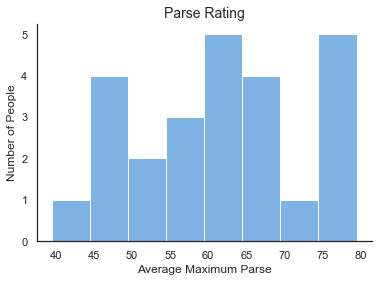

In [376]:
plt.hist(rankings_df.percentile[2:], bins=bins, color='#7fb3e6', edgecolor='white')
plt.title("Parse Rating", fontsize=14)
plt.xlabel("Average Maximum Parse")
plt.ylabel('Number of People');
sns.despine()

In [377]:
rankings_df.percentile[1:].median()

61.951388888888886

<a id='prog-parse'></a>
### Max Progression Parse

In [60]:
# Get only kill logs
first_kills = la.first_kill_logs(master_list)
first_kills.to_csv('first_kill_logs.csv', index=False)

This was eventually done manually - winner Arkamani 95 N'Zoth.

<a id='least-damage'></a>
### Least Damage on Progression Kills

In [61]:
least_damage = wl.damage_taken(api_key, first_kills, spell_id=None, hit_type='total')

Player added: Lauly
Player added: Mystrah
Player added: Nockedloose
Player added: Mythrose
Player added: Cunegonde
Player added: Seghor
Player added: Petrøl
Player added: Metonymy
Player added: Toyqt
Player added: Stradlock
Player added: Luthial
Player added: Shadowbaine
Player added: Voidsp
Player added: Irvaeryss
Player added: Divinance
Player added: Atallstalker
Player added: Bobbydigital
Player added: Ayreia
Player added: Owoo
Player added: Earrl
Player added: Moomir
Player added: Onggor
Player added: Kopyeqt
Player added: Ølympius
Player added: Bobbydigital
Player added: Shadowbaine
Player added: Owoo
Player added: Atallstalker
Player added: Mythrose
Player added: Metonymy
Player added: Petrøl
Player added: Luthial
Player added: Voidsp
Player added: Kopyeqt
Player added: Moomir
Player added: Onggor
Player added: Rázõr
Player added: Ayreia
Player added: Lauly
Player added: Toyqt
Player added: Ølympius
Player added: Earrl
Player added: Divinance
Player added: Hocc
Player added: Ølym

In [62]:
# Create column for fight count
least_damage['fight_count'] = 1
# Manage alts
la.change_names(least_damage, player_list)

# Group by players
df_least = least_damage.groupby('player').sum().sort_values('damage_taken')\
           .reset_index()

# Get count for at least 6 fights
df_least = df_least[df_least.fight_count >= 5]
df_least['per_fight'] = df_least.damage_taken/df_least.fight_count
df_least

,player,hits,damage_taken,fight_count,per_fight
13,Cunegonde,447298276,447298276,7,6.389975e+07
14,Luthial,465647796,465647796,7,6.652111e+07
15,Irvaeryss,482141028,482141028,9,5.357123e+07
16,Hocc,492008076,492008076,6,8.200135e+07
17,Lauly,508110313,508110313,7,7.258719e+07
18,Nockedloose,532638885,532638885,9,5.918210e+07
19,Stradlock,534909985,534909985,7,7.641571e+07
20,Owoo,553225370,553225370,7,7.903220e+07
21,Niccom,560677392,560677392,8,7.008467e+07
22,Shadowbaine,622805068,622805068,8,7.785063e+07


In [385]:
bins = np.arange(1.1e7, 2e7, 0.1e7)

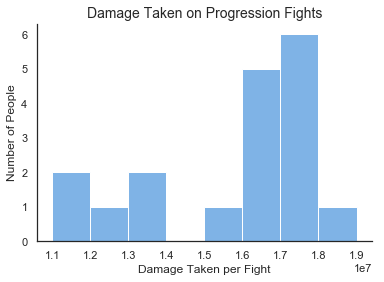

In [386]:
df_least = la.join_player_roles(df_least, player_list)
la.plot_hist(df_least.per_fight[:-2], bins, 'Damage Taken on Progression Fights', 'Damage Taken per Fight')

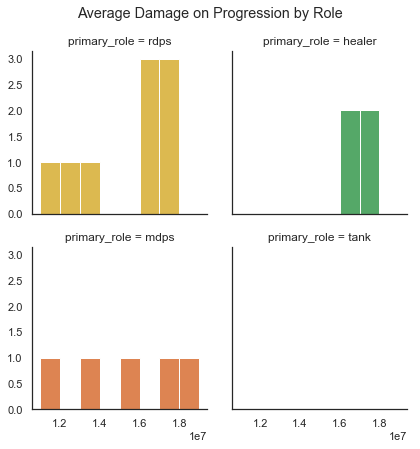

In [388]:
palette=['#dcb950', '#55a868', '#dd8452', '#4c72b0', '#7fb3e6']
g = sns.FacetGrid(df_least, col='primary_role', hue='primary_role',
                      col_wrap=2, palette=palette,
                      col_order=['rdps', 'healer', 'mdps', 'tank'],
                      hue_order=['rdps', 'healer', 'mdps', 'tank'])
g.map(plt.hist, "per_fight", bins=bins, edgecolor='white')
for i in np.arange(2, 4):
    g.axes[i].set_xlabel('')
plt.suptitle("Average Damage on Progression by Role", y=1.04);

In [389]:
df_least.to_csv('guild_awards/overall_least_damage_taken.csv', index=False)